<a href="https://colab.research.google.com/github/jomariy241/assignment/blob/main/regression_case_study_U.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('/content/winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

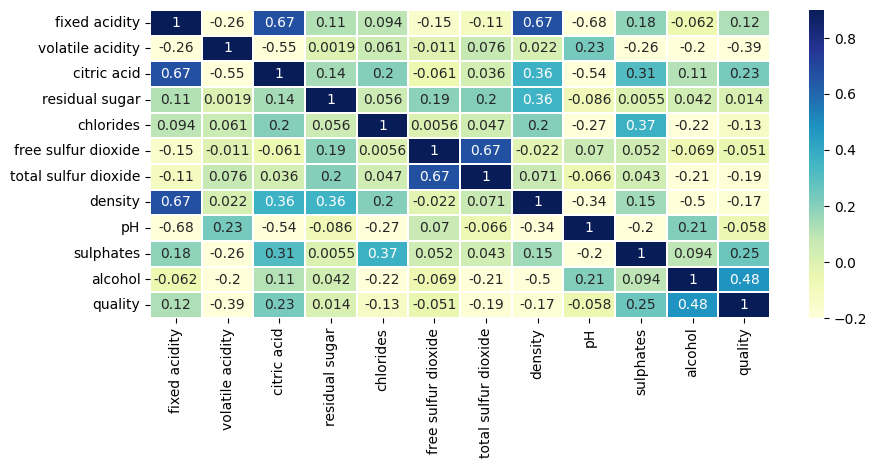

In [10]:
matrix=df.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(matrix,annot=True,vmin=-0.2,vmax=0.9,linewidths=0.2,cmap='YlGnBu')
plt.show()

In [15]:
# drop column density
df.drop('density',axis=1,inplace=True)

In [17]:
df.shape

(1599, 11)

In [18]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

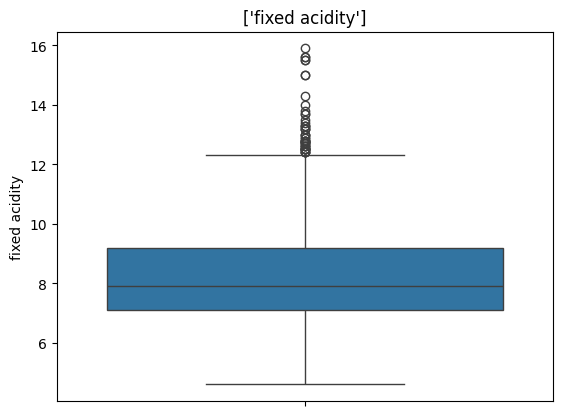

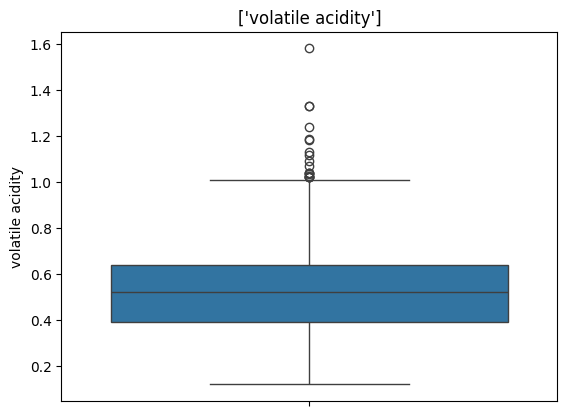

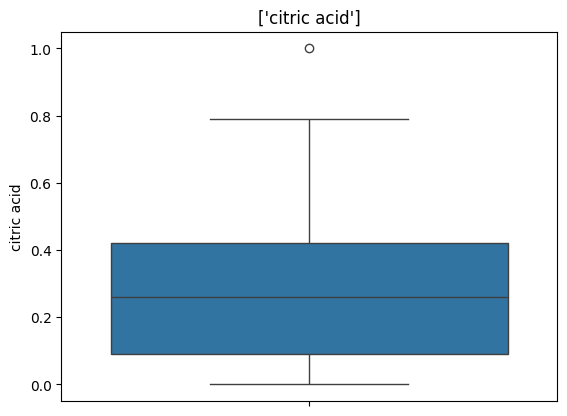

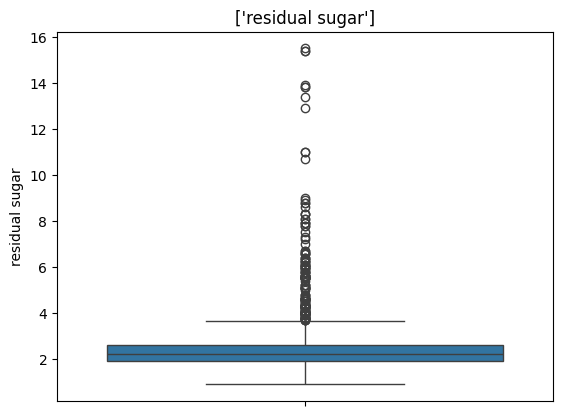

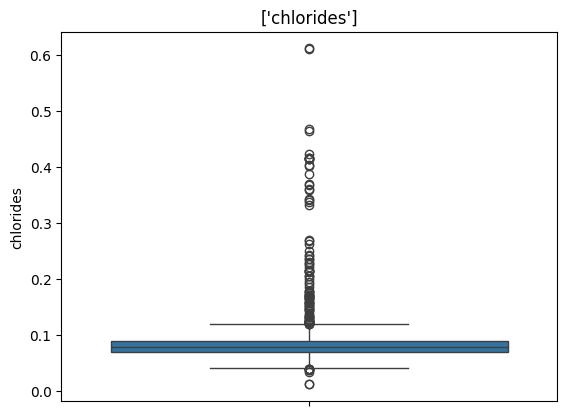

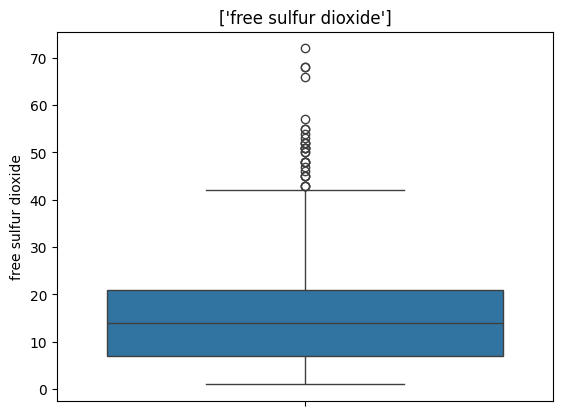

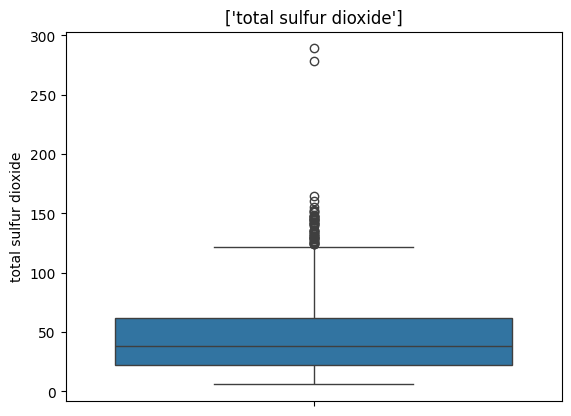

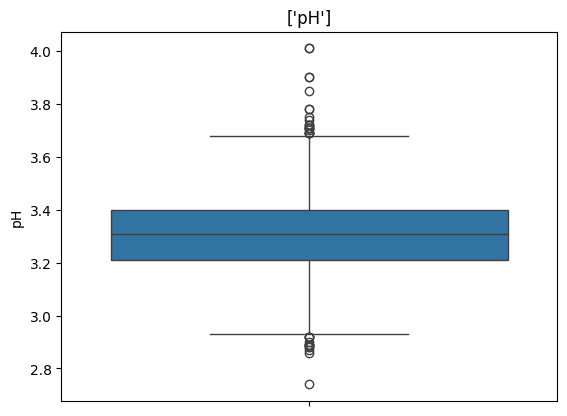

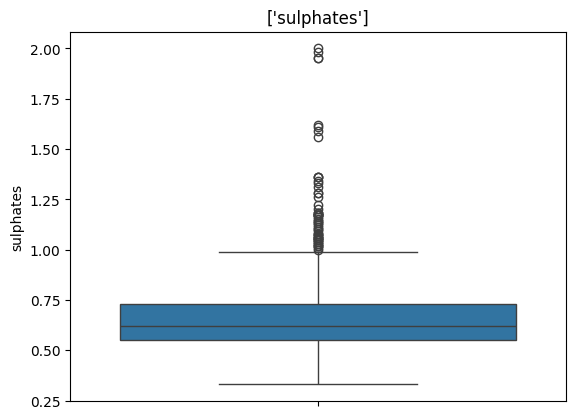

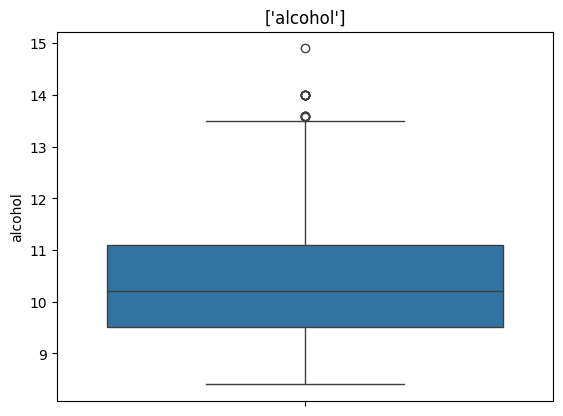

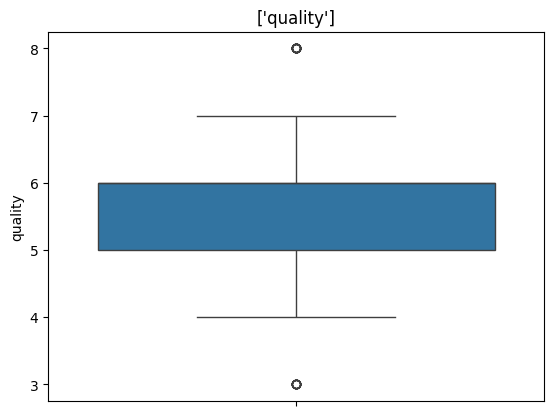

In [19]:
#outliers of data
for i in['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'quality']:
 sns.boxplot(df[i])
 plt.title([i])
 plt.show()

In [20]:
#preprocessing
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['quality']=le.fit_transform(df['quality'])

In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,2


In [30]:
#one hot encoding data
data=df.copy()
data=pd.get_dummies(data,drop_first=True)
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,False,False,True,False,False,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,False,False,True,False,False,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,False,False,True,False,False,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,False,False,False,True,False,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,False,False,True,False,False,False


In [31]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'quality_0', 'quality_1', 'quality_2',
       'quality_3', 'quality_4', 'quality_5'],
      dtype='object')

In [32]:
for i  in ['quality_0', 'quality_1', 'quality_2',
       'quality_3', 'quality_4', 'quality_5']:
       data[i]=data[i].astype('int64')


In [33]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0,0,1,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0,0,1,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0,0,1,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0,0,0,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0,0,1,0,0,0


In [36]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [37]:
columns_to_scale = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'quality_0', 'quality_1', 'quality_2',
       'quality_3', 'quality_4', 'quality_5']

data[columns_to_scale] =sc.fit_transform(data[columns_to_scale])
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,1.288643,-0.579207,-0.960246,-0.07933,-0.185154,1.161042,-0.814796,-0.377018,-0.106701
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,-0.719933,0.128950,-0.584777,-0.07933,-0.185154,1.161042,-0.814796,-0.377018,-0.106701
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,-0.331177,-0.048089,-0.584777,-0.07933,-0.185154,1.161042,-0.814796,-0.377018,-0.106701
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,-0.979104,-0.461180,-0.584777,-0.07933,-0.185154,-0.861296,1.227302,-0.377018,-0.106701
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,1.288643,-0.579207,-0.960246,-0.07933,-0.185154,1.161042,-0.814796,-0.377018,-0.106701


In [43]:
data=pd.read_csv('/content/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [74]:
X = data.drop('quality', axis=1)
y = data['quality']

In [77]:
#spliting datafor text and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [75]:
#create model import leanear regration
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [78]:
model=lr.fit(x_train,y_train)


In [79]:
#predict test data
pred=model.predict(x_test)
pred

array([6., 5., 6., 5., 6., 5., 5., 5., 5., 6., 7., 3., 5., 5., 6., 7., 5.,
       7., 8., 5., 5., 6., 5., 6., 6., 6., 7., 6., 5., 6., 5., 5., 6., 5.,
       6., 5., 7., 5., 4., 6., 5., 5., 7., 5., 5., 6., 7., 6., 5., 6., 5.,
       5., 5., 7., 6., 6., 6., 5., 5., 5., 5., 7., 5., 6., 6., 5., 6., 5.,
       6., 5., 6., 4., 6., 6., 6., 5., 8., 5., 6., 6., 5., 6., 5., 6., 6.,
       7., 5., 6., 7., 4., 7., 6., 5., 5., 5., 6., 5., 6., 5., 6., 5., 5.,
       5., 7., 6., 7., 6., 5., 6., 5., 8., 5., 6., 5., 6., 7., 6., 6., 5.,
       6., 6., 6., 6., 6., 6., 6., 7., 6., 5., 5., 6., 5., 5., 5., 6., 5.,
       5., 5., 5., 6., 7., 6., 8., 5., 5., 5., 6., 6., 6., 5., 6., 7., 6.,
       5., 6., 5., 5., 6., 6., 6., 7., 5., 7., 5., 5., 5., 6., 6., 5., 5.,
       6., 5., 7., 6., 7., 6., 6., 5., 5., 6., 4., 6., 5., 7., 5., 5., 4.,
       5., 7., 6., 5., 6., 6., 7., 6., 5., 5., 6., 5., 7., 5., 6., 6., 5.,
       7., 5., 5., 5., 6., 7., 7., 5., 5., 6., 6., 7., 6., 5., 6., 6., 6.,
       6., 6., 7., 4., 5.

In [80]:
#evaluate actual value and predict value in mean square error
from sklearn.metrics import mean_squared_error
print('mse =',mean_squared_error(y_test,pred))


mse = 1.7921933690489863e-30


In [81]:
#evaluate actual value and predict value in r2 score
from sklearn.metrics import r2_score
print('r score =',r2_score(y_test,pred))
# 0 is perfect data

r score = 1.0


In [82]:
#evaluate actual value and predict value
from sklearn.metrics import r2_score
print('r score =',r2_score(y_test,pred))

r score = 1.0


In [86]:
y_pred =lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

<ipython-input-87-cae2ff96e0fc>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


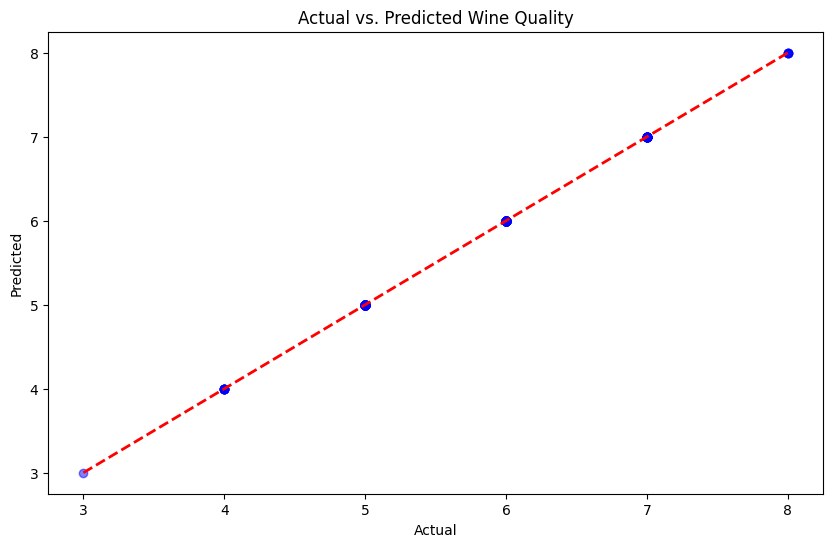

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Wine Quality')
plt.show()